In [3]:
import numpy as np
import matplotlib.pyplot as plt

img_path = "..\Assets\lenna.txt"
original = np.loadtxt(img_path, dtype=np.uint8)
original = original.reshape(300, 300)


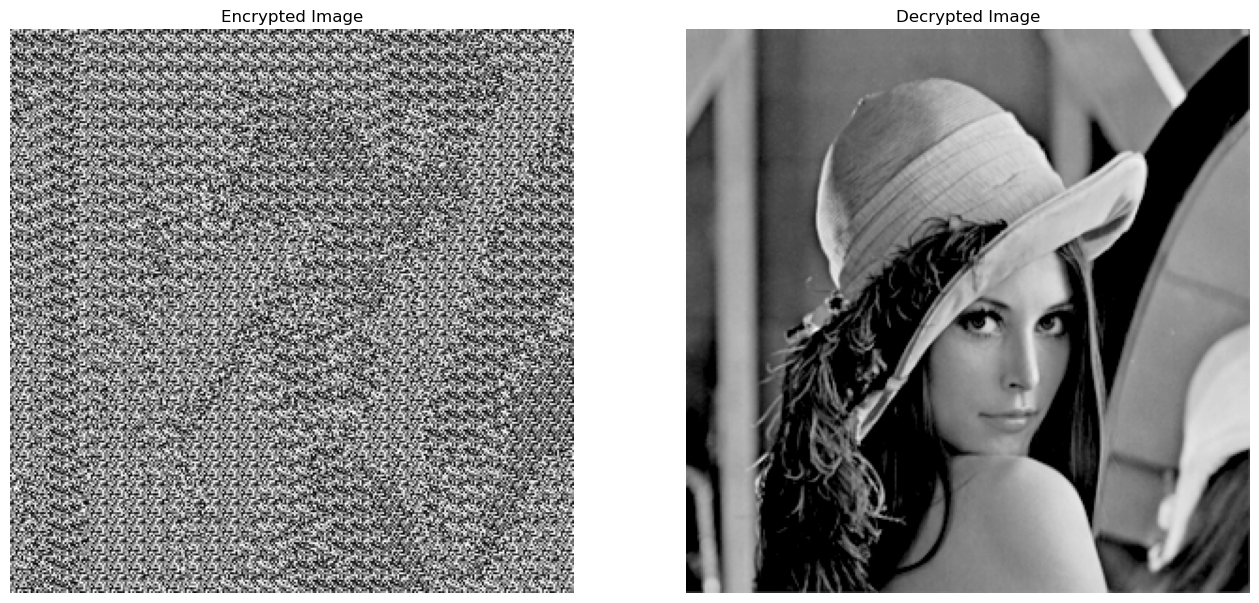

In [5]:
img_height = 300
img_width = 300
block_size = 10
vhex = np.vectorize(hex)

def get_block(img,i,j):
    b1 = img[j*block_size:(j+1)*block_size,i*block_size:(i+1)*block_size]
    return b1

def arr_to_vec(b1):
    b1 = b1.T
    b1 = b1.flatten()
    b1 = b1[::-1]
    return b1

def vec_to_arr(b1):
    b2 = b1[::-1]
    b2 = b2.reshape(10,10)
    b2 = b2.T
    return b2



from main03 import Grain128, ndarray_to_hex

def encrypt(img):
    iv = int("000000000000000000000000",16)
    key = int("00000000000000000000000000000000",16)

    cipher_img = np.zeros((img_height, img_width), dtype=np.uint8)
    grain = Grain128(key, iv)
    key_stream = grain._generate(800)
    key_stream = ndarray_to_hex(key_stream)[2:].zfill(200)



    for i in range(img_height//block_size):
        for j in range(img_width//block_size):
            b1 = get_block(img,i,j)
            b1 = arr_to_vec(b1)        
            b1 = b1.tobytes()    
            cipher = int(key_stream, 16) ^ int.from_bytes(b1, "big")
            cipher_text = bytes.fromhex(hex(cipher)[2:].zfill(200))

            c = int.from_bytes(cipher_text, "big")
            c = hex(c)[2:].zfill(200)

            cipher_arr = np.array([int(c[i:i+2], 16) for i in range(0, len(c), 2)])
            cipher_arr = vec_to_arr(cipher_arr)
            cipher_img[j*block_size:(j+1)*block_size,i*block_size:(i+1)*block_size] = cipher_arr
    return cipher_img


cipher_img = encrypt(original)
decipher_img = encrypt(cipher_img)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(cipher_img, cmap='gray')
plt.axis('off')
plt.title("Encrypted Image")
plt.subplot(1,2,2)
plt.imshow(decipher_img, cmap='gray')
plt.axis('off')
plt.title("Decrypted Image")
plt.show()


        

Reading data from serial port...
Data read from serial port...
Time taken to read data from serial port: 106.68s


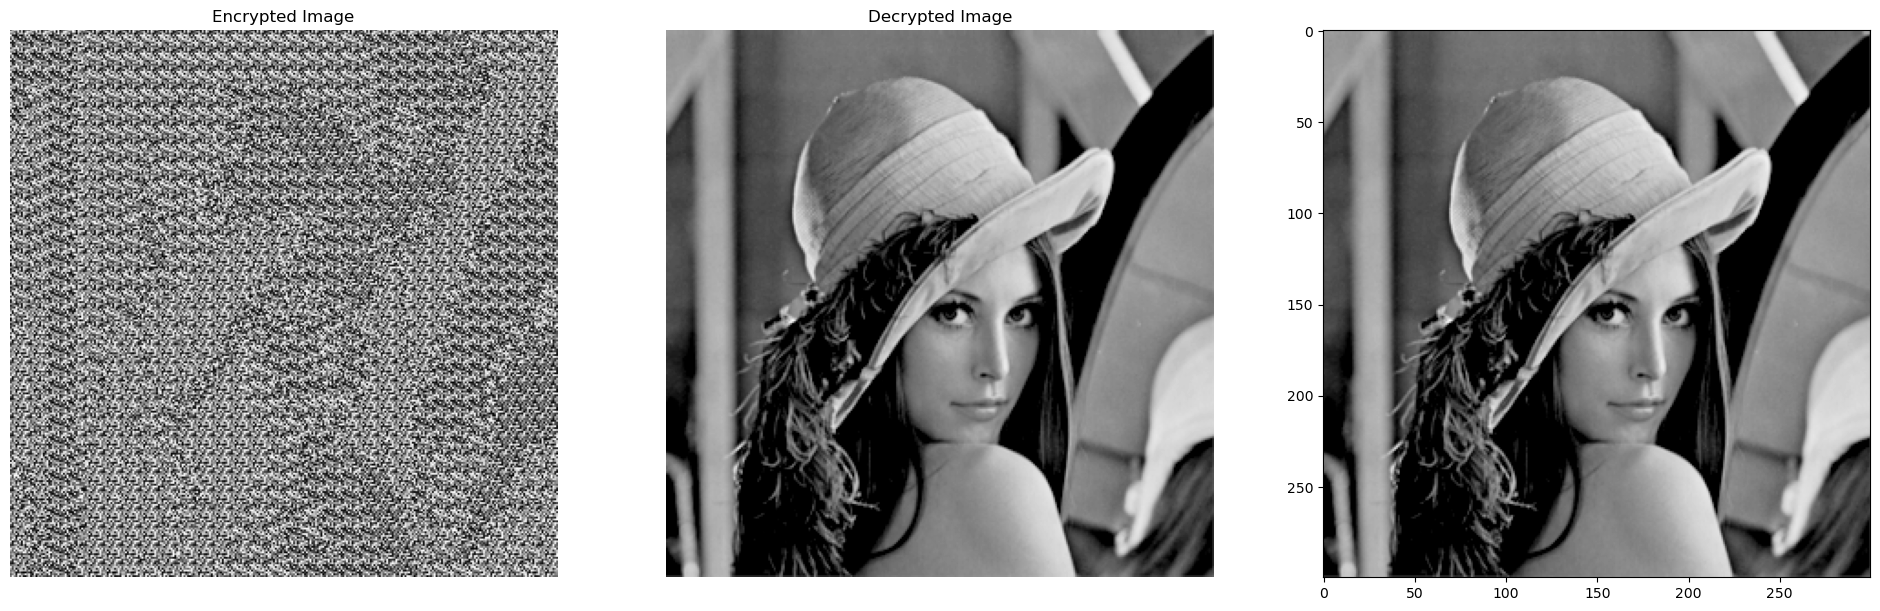

In [26]:
# Receive Image from UART
import serial 
import numpy as np
import time

serial_data = serial.Serial("COM4",9600)
ARRAY_SIZE = 90000

print("Reading data from serial port...")
start = time.time()
dat = serial_data.read(ARRAY_SIZE)
print("Data read from serial port...")
end = time.time()
print(f"Time taken to read data from serial port: {np.round(end-start,2)}s")
im = np.frombuffer(dat, dtype=np.uint8)
uart_img = im.reshape(300,300) # encrypted image


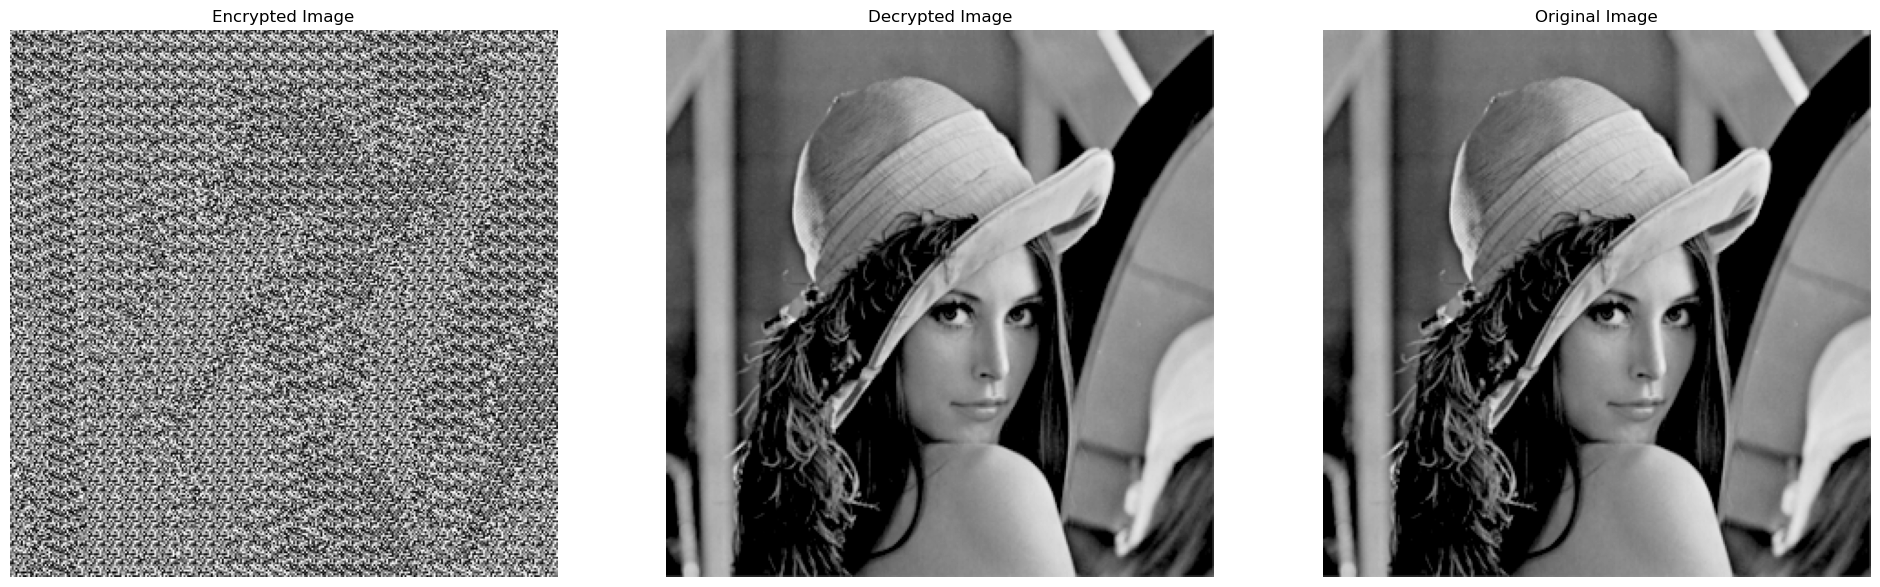

In [30]:
img = encrypt(uart_img)

plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
plt.imshow(uart_img, cmap='gray')
plt.axis('off')
plt.title("Encrypted Image")
plt.subplot(1,3,2)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Decrypted Image")
plt.subplot(1,3,3)
plt.axis('off')
plt.title("Original Image")
plt.imshow(original, cmap='gray')
plt.show()

In [27]:
get_block(uart_img,0,0)

array([[ 67, 164, 225, 208, 225,  84, 211,  63, 100, 100],
       [207, 177, 113,  70, 225,  61, 212,   7, 124, 235],
       [134, 134, 192,  47, 117, 189, 201, 111, 242, 211],
       [254,  18,  30,   5, 153,  22,   0,  80, 199,  61],
       [121, 203,  47,  49,  10, 250,  85,  73, 113, 224],
       [ 58, 209,  92, 151,  25,  41,  42, 176,  13, 123],
       [229,  16, 224, 102, 158,  66,  85,  60,  23, 126],
       [ 28,  40,  31, 155, 188, 243, 132, 149, 164,  77],
       [200,  16,  89, 140, 100, 119, 228,  19,  95,  74],
       [204,  64,  35, 252,  83, 140, 127, 175, 174, 158]], dtype=uint8)

In [28]:
get_block(cipher_img,0,0)

array([[ 67, 164, 225, 208, 225,  84, 211,  63, 100, 100],
       [207, 177, 113,  70, 225,  61, 212,   7, 124, 235],
       [134, 134, 192,  47, 117, 189, 201, 111, 242, 211],
       [254,  18,  30,   5, 153,  22,   0,  80, 199,  61],
       [121, 203,  47,  49,  10, 250,  85,  73, 113, 224],
       [ 58, 209,  92, 151,  25,  41,  42, 176,  13, 123],
       [229,  16, 224, 102, 158,  66,  85,  60,  23, 126],
       [ 28,  40,  31, 155, 188, 243, 132, 149, 164,  77],
       [200,  16,  89, 140, 100, 119, 228,  19,  95,  74],
       [204,  64,  35, 252,  83, 140, 127, 175, 174, 158]], dtype=uint8)